### Actividad: Predicción del Precio de Automóviles
### Nombres:__Nico y Jos____

#### Objetivo: 
El propósito de esta actividad es que los alumnos, trabajando en parejas, practiquen y se familiaricen con el proceso completo para modelar una regresión lineal simple, desde la carga de datos hasta la interpretación de resultados, con el fin de predecir el precio de automóviles en función de su año de fabricación. 

#### Intrucciones:

1. Descarga del Dataset: Descarga el dataset [Car Price Prediction](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) de Kaggle. Las columnas de dataset son:
-  `name`
-  `year`
-  `selling_price`
-  `km_driven`
-  `fuel`
-  `seller_type`
-  `transmission`
-  `Owner`

Carguen los datos en un DataFrame de Pandas y realicen:  
    - Análisis de estructura (dimensiones, tipos de datos)  
    - Detección y tratamiento de valores nulos/inconsistentes  
    - Limpieza y transformación de datos cuando sea necesario  

2. Selección y Análisis de Variables:  
    - Evalúen la correlación entre variables utilizando Matrices de correlación  
    - Justifiquen la selección de variables para el modelo

3. Desarrollo del Modelo Predictivo:  
    - Verifiquen el supuesto de linealidad entre variables a través de un gráfico
    - Dividan el dataset (80% entrenamiento - 20% prueba) considerando una semilla para que los datos proporcionados sean los mismo cada vez que ejecuto el código.
    - Entrenen el modelo de regresión lineal.
    - Usen el modelo para hacer predicciones en los datos de prueba.

4. Visualización y Interpretación:  
    - Generen un gráfico de dispersión profesional que incluya:  
        * Puntos de datos reales  
        * Línea de regresión  
        * Etiquetas claras y leyenda  

  ##### Análisis del Modelo:

    1. ¿Qué relación cuantitativa existe entre el año de fabricación y el precio según el coeficiente β₁?
    2. ¿Identifican algún patrón no lineal que sugiera la necesidad de otro tipo de modelo?
    3. ¿Qué tendencias se pueden obtener del modelo considerando las variables utilizadas?




In [7]:
#Importar bibliotecas 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Carguen los datos en un DataFrame de Pandas
car_data = pd.read_csv('Data/CAR DETAILS FROM CAR DEKHO.csv', index_col='name')
#display(car_data.head())

#Análisis de estructura (dimensiones, tipos de datos)
car_data.info()

#Detección y tratamiento de valores nulos/inconsistentes  
display(car_data.isnull().sum())

#Limpieza y transformación de datos cuando sea necesario  
    #No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 4340 entries, Maruti 800 AC to Renault KWID RXT
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 271.2+ KB


year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

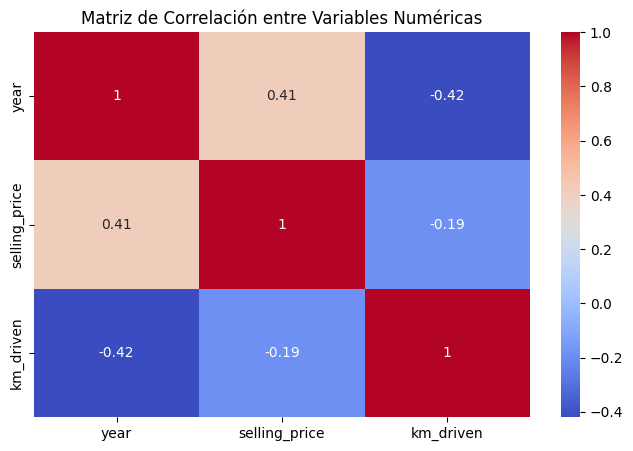

In [8]:
#2. Selección y Análisis de Variables:  
#    - Evalúen la correlación entre variables utilizando Matrices de correlación  
#   - Justifiquen la selección de variables para el modelo

# Calcular matriz de correlación (solo para columnas numéricas)
corr_matrix = car_data.select_dtypes(include=['number']).corr()

# Mostrar matriz de correlación visualmente
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Elegimos year como variable predictora del modelo de regresión lineal ya que
# es la que explica de forma mas directa la variacion de los precios de los autos

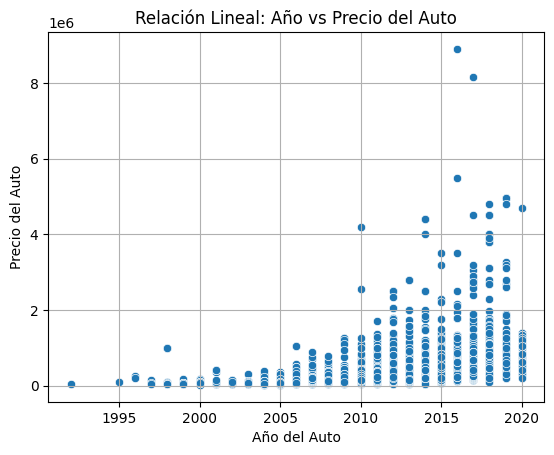

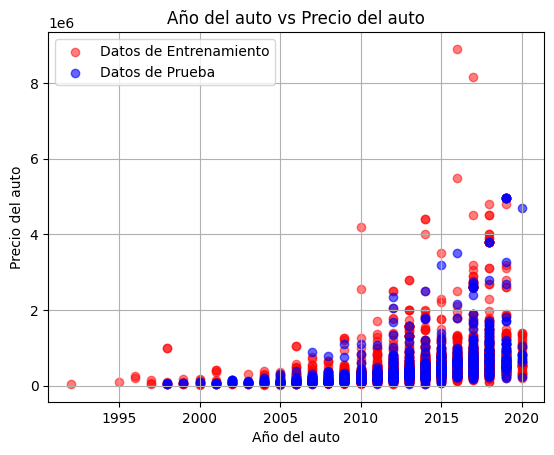

El precio predicho de un auto en 2022 es de 998384.32 dólares.


In [23]:
#3. Desarrollo del Modelo Predictivo:  
#    - Verifiquen el supuesto de linealidad entre variables a través de un gráfico

x = car_data['year']
y = car_data['selling_price']

sns.scatterplot(data=car_data, x='year', y='selling_price')
plt.ylabel('Precio del Auto')
plt.xlabel('Año del Auto')
plt.title('Relación Lineal: Año vs Precio del Auto')
plt.grid(True)
plt.show()

#    - Dividan el dataset (80% entrenamiento - 20% prueba) considerando una semilla para que los datos proporcionados sean los mismo cada vez que ejecuto el código.
# Dividir en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
# Resultados

# Crear una gráfica de dispersión para ver la relación entre SalePrice y GrLivArea
plt.scatter(x_train, y_train, color='red', alpha=0.5, label='Datos de Entrenamiento')
plt.scatter(x_test, y_test, color='blue', alpha=0.6, label='Datos de Prueba')
plt.legend()
plt.ylabel('Precio del auto')
plt.xlabel('Año del auto')
plt.title('Año del auto vs Precio del auto')
plt.grid(True)
plt.show()
#    - Entrenen el modelo de regresión lineal.

model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

#    - Usen el modelo para hacer predicciones en los datos de prueba.

y_pred = model.predict(x_test.values.reshape(-1, 1))
#precio_2022 = model.predict(np.array([[2022]]))[0][0]
print(f"El precio predicho de un auto en 2022 es de {model.predict(np.array([[2022]]))[0][0].round(2)} dólares.")


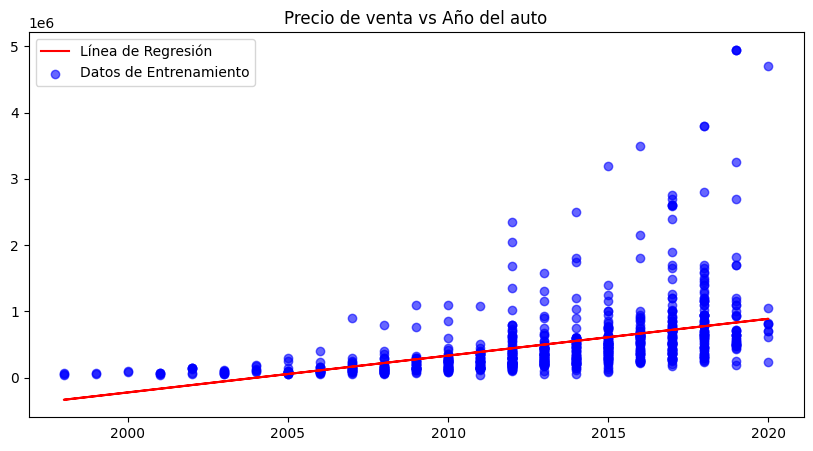

In [24]:
#4. Visualización y Interpretación:  
#    - Generen un gráfico de dispersión profesional que incluya:  
#        * Puntos de datos reales  
#        * Línea de regresión  
#        * Etiquetas claras y leyenda  

# Gráfico de dispersión
plt.figure(figsize=(10,5))
plt.plot(x_test, y_pred, color='red', label='Línea de Regresión')
plt.scatter(x_test, y_test, color='blue', alpha=0.6, label='Datos de Entrenamiento')
plt.legend()
plt.title('Precio de venta vs Año del auto')
plt.show()
